# Group Work Project #2
Names: Alfonso, Scholastica, Nwosu Stephen

In [ ]:
pip install fredapi

In [ ]:
from fredapi import Fred
import pandas as pd

import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

# Financing Scenarios

* Money at a fixed rate for an unsecured purchase
* Money at a floating rate for a secured purchase
* Money at a fixed rate for a business for a construction loan
* Publicly traded equity
* Publicly traded bond
* An illiquid security

## Money at a fixed rate for an unsecured purchase

In [ ]:
# Fetching data to analyze
stock_data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')

# Calculate daily returns
stock_data['Daily Returns'] = stock_data['Adj Close'].pct_change()

# Calculate rolling volatility (21-day window) and annualize it
stock_data['Volatility'] = stock_data['Daily Returns'].rolling(window=21).std() * np.sqrt(252)

# Fetch trading volume
stock_data['Avg Volume'] = stock_data['Volume'].rolling(window=21).mean()

stock_data.dropna(subset=['Daily Returns', 'Volatility', 'Avg Volume'], inplace=True)

# Check data
print(stock_data.describe)

[*********************100%***********************]  1 of 1 completed

<bound method NDFrame.describe of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-02-03   76.074997   78.372498   75.555000   77.165001   74.892410   
2020-02-04   78.827499   79.910004   78.407501   79.712502   77.364891   
2020-02-05   80.879997   81.190002   79.737503   80.362503   77.995750   
2020-02-06   80.642502   81.305000   80.065002   81.302498   78.908066   
2020-02-07   80.592499   80.849998   79.500000   80.007500   77.835510   
...                ...         ...         ...         ...         ...   
2022-12-23  130.919998  132.419998  129.639999  131.860001  130.631363   
2022-12-27  131.380005  131.410004  128.720001  130.029999  128.818405   
2022-12-28  129.669998  131.029999  125.870003  126.040001  124.865601   
2022-12-29  127.989998  130.479996  127.730003  129.610001  128.402328   
2022-12-30  128.410004  129.949997  127.430000  129.929993  128.719330   

   

In [ ]:
# Set up your FRED API key
fred = Fred(api_key='312fc3be27db43a836ff04bc5fce7453')

# Fetch interest rates (example: Effective Federal Funds Rate)
interest_rate_data = fred.get_series('FEDFUNDS')

# Fetch unemployment rate data
unemployment_data = fred.get_series('UNRATE')

# Fetch consumer delinquency rates (e.g., credit cards)
delinquency_data = fred.get_series('DRCCLACBS')

# Fetch debt-to-income ratio (Household Debt Service Payments as a % of Disposable Personal Income)
debt_to_income_data = fred.get_series('TDSP')

# Create DataFrames from FRED data
interest_rate_df = pd.DataFrame(interest_rate_data, columns=['Interest Rate'])
unemployment_df = pd.DataFrame(unemployment_data, columns=['Unemployment Rate'])
delinquency_df = pd.DataFrame(delinquency_data, columns=['Delinquency Rate'])
debt_to_income_df = pd.DataFrame(debt_to_income_data, columns=['Debt-to-Income Ratio'])

# Check data
print(interest_rate_df.head())
print(unemployment_df.head())
print(delinquency_df.head())
print(debt_to_income_df.head())


            Interest Rate
1954-07-01           0.80
1954-08-01           1.22
1954-09-01           1.07
1954-10-01           0.85
1954-11-01           0.83
            Unemployment Rate
1948-01-01                3.4
1948-02-01                3.8
1948-03-01                4.0
1948-04-01                3.9
1948-05-01                3.5
            Delinquency Rate
1991-01-01              5.26
1991-04-01              5.48
1991-07-01              5.35
1991-10-01              5.32
1992-01-01              5.27
            Debt-to-Income Ratio
1980-01-01             10.608892
1980-04-01             10.629809
1980-07-01             10.402635
1980-10-01             10.253121
1981-01-01             10.291887


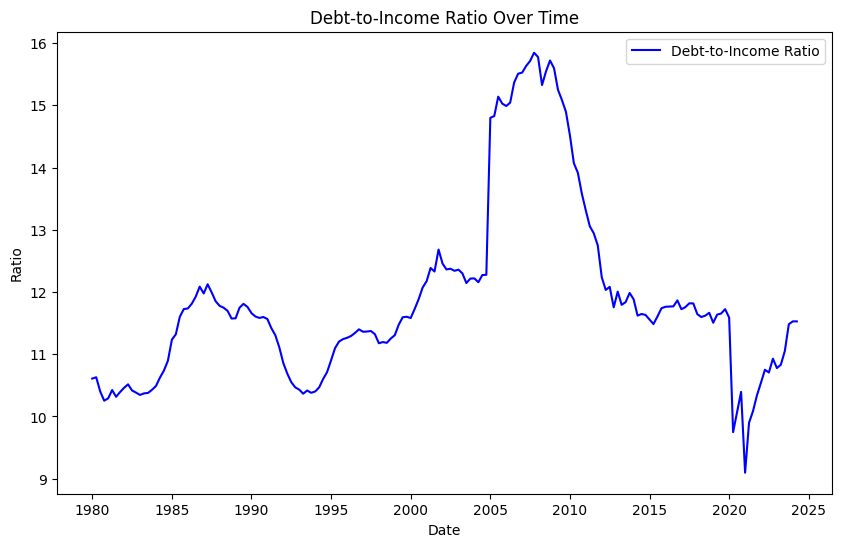

In [ ]:
# Financial data series to analyze

# Magnifying risks (leverage and non-linearity)

# Plot Debt-to-Income Ratio over time
plt.figure(figsize=(10, 6))
plt.plot(debt_to_income_df.index, debt_to_income_df['Debt-to-Income Ratio'], label='Debt-to-Income Ratio', color='blue')
plt.title('Debt-to-Income Ratio Over Time')
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.legend()
plt.show()

Insight: Rising debt levels mean borrowers are becoming more leveraged, making small interest rate changes potentially cause shocks to income levels.

In [ ]:
# simulating usury limits
usury_limit = 15 # Assuming the interest rate cap is 15%

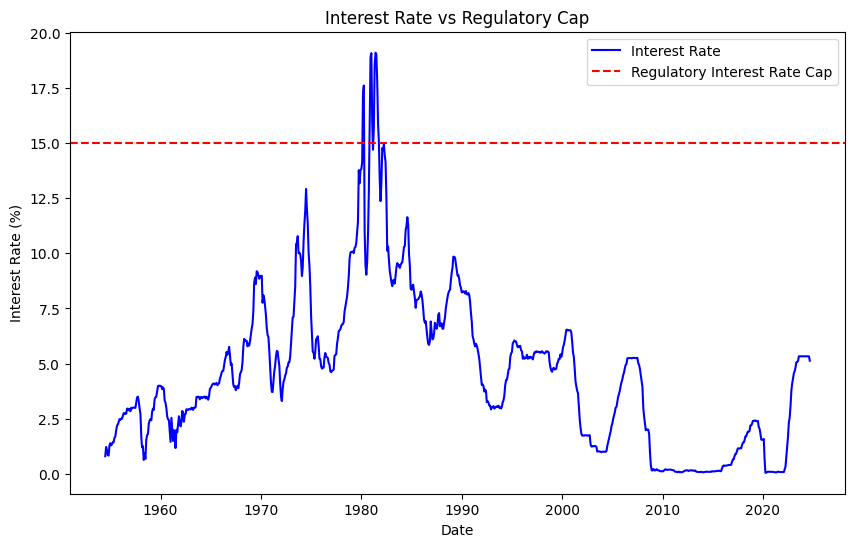

In [ ]:
# Plot interest rates and regulatory cap (usury limit)
plt.figure(figsize=(10, 6))
plt.plot(interest_rate_df.index, interest_rate_df['Interest Rate'], label='Interest Rate', color='blue')
plt.axhline(y=usury_limit, color='red', linestyle='--', label='Regulatory Interest Rate Cap')
plt.title('Interest Rate vs Regulatory Cap')
plt.xlabel('Date')
plt.ylabel('Interest Rate (%)')
plt.legend()
plt.show()

Insight: Interest rate caps limit lenders from pricing risk during times of risking interest rates leading to potential lossees from borrower default.

## Money at a floating rate for a secured purchase

In [ ]:
import pandas as pd
import yfinance as yf
from fredapi import Fred
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Setting up FRED API key
fred = Fred(api_key='bdfb2ffb9f9d4b9c8dfda3a5bd6550d0')
start = datetime.date.today() - datetime.timedelta(days=10*365)
end = datetime.date.today()
# Fetching SOFR interest rate, Case-Shiller home price Index, deliquency rate and unemployment rate
sofr = fred.get_series('SOFR',start, end)
home_price_index = fred.get_series('CSUSHPINSA', start, end)
delinquency_rate = fred.get_series('DRSFRMACBS', start, end)
unemployment_rate = fred.get_series('UNRATE', start, end)

#individual dataframes
deli_df = pd.DataFrame(delinquency_rate, columns=['Delinquency Rate'])
sofr_df = pd.DataFrame(sofr, columns=['Interest Rate'])
unemployment_df = pd.DataFrame(unemployment_rate, columns=['Unemployment Rate'])
home_price_df = pd.DataFrame(home_price_index, columns=['Home Price'])

#combining data
data = pd.DataFrame({
    'SOFR': sofr,
    'Home_Price_Index': home_price_index,
    'Delinquency_Rate': delinquency_rate,
    'Unemployment_Rate': unemployment_rate
})
data.dropna(inplace=True)


In [ ]:
data.head()

,SOFR,Home_Price_Index,Delinquency_Rate,Unemployment_Rate
2018-10-01,2.22,205.361,2.83,3.8
2019-04-01,2.46,207.679,2.60,3.7
2019-07-01,2.42,211.328,2.44,3.7
2019-10-01,1.88,211.958,2.34,3.6
2020-04-01,0.01,217.229,2.54,14.8


In [ ]:
sofr_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1699 entries, 2018-04-03 to 2024-10-04
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Interest Rate  1628 non-null   float64
dtypes: float64(1)
memory usage: 91.1 KB


In [ ]:
#getting the data's information
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13 entries, 2018-10-01 to 2024-04-01
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SOFR               13 non-null     float64
 1   Home_Price_Index   13 non-null     float64
 2   Delinquency_Rate   13 non-null     float64
 3   Unemployment_Rate  13 non-null     float64
dtypes: float64(4)
memory usage: 520.0 bytes


<Figure size 1000x600 with 0 Axes>

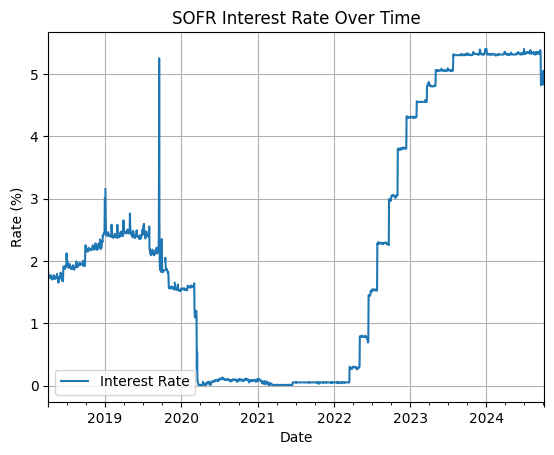

In [ ]:
#plotting the interest rate over time
plt.figure(figsize=(10, 6))
sofr_df.plot()
plt.title('SOFR Interest Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.grid()
plt.show()


The plot above shows the interest rate fluctuations over time demonstrating how floating rates affect loan payments unpredictably, increasing the likelihood of sudden payment shocks. The interest rates were pretty low in the period of 2020-2022, due to COVID-19

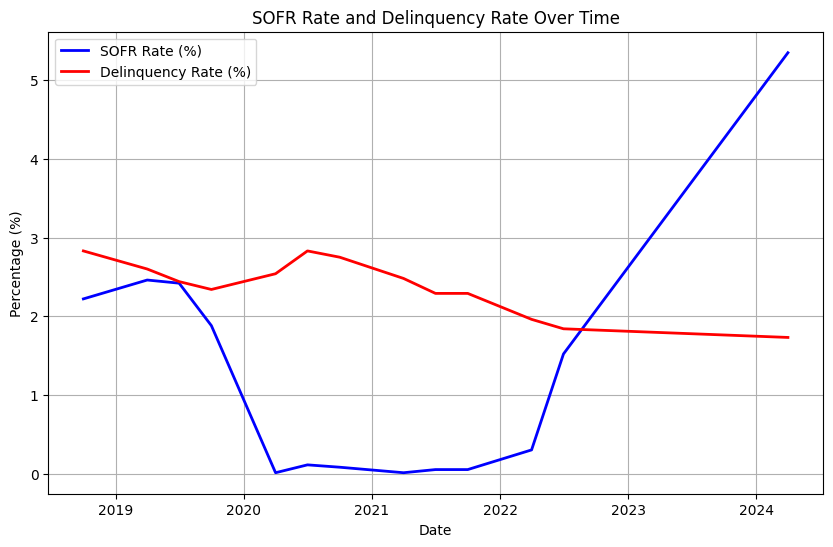

In [ ]:
#Interest Rate (SOFR) vs. Delinquency Rate
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['SOFR'], label='SOFR Rate (%)', color='blue', linewidth=2)
plt.plot(data.index, data['Delinquency_Rate'], label='Delinquency Rate (%)', color='red', linewidth=2)
plt.title('SOFR Rate and Delinquency Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage (%)')
plt.legend()
plt.grid()
plt.show()


The visualization above is highlighting the impact of rising rates on default risk, illustrating how leverage exposes borrowers to rate sensitivity.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


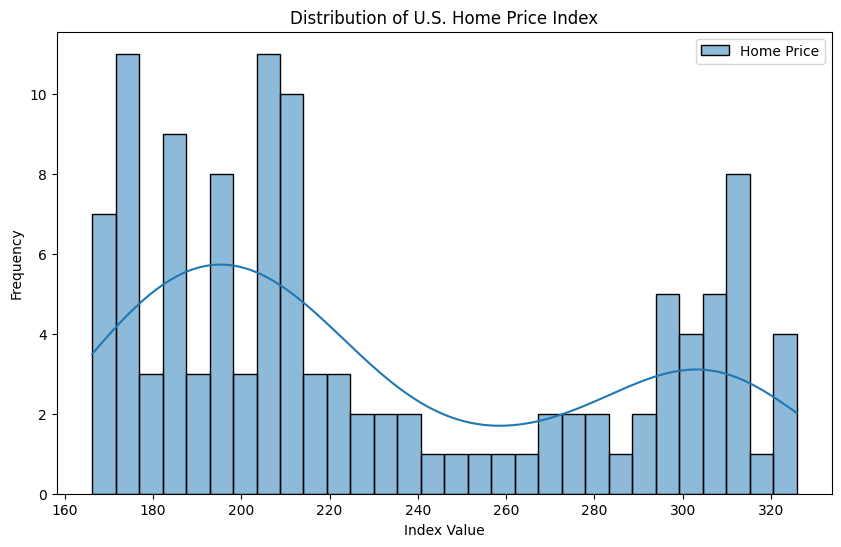

In [ ]:
#plotting the Distribution of Housing Price Index
plt.figure(figsize=(10, 6))
sns.histplot(home_price_df, bins=30, kde=True)
plt.title('Distribution of U.S. Home Price Index')
plt.xlabel('Index Value')
plt.ylabel('Frequency')
plt.show()


The plot above demonstrates fluctuations in the housing market which affect loan liquidity as collateral values change hence impacting the resale value of foreclosed properties.

## Money at a fixed rate for a business for a construction loan

In [ ]:
# 10-Year Treasury Yield
interest_rates = fred.get_series('GS10')  # 10-Year Treasury Constant Maturity Rate

# Total Construction Spending data
construction_spending = fred.get_series('TTLCONS')

# Inflation data (Consumer Price Index for All Urban Consumers)
inflation_rate = fred.get_series('CPIAUCSL')

df_fred = pd.DataFrame({
    'Interest_Rates': interest_rates,
    'Construction_Spending': construction_spending,
    'Inflation_Rate': inflation_rate
}).dropna()

df_fred_normalized = df_fred / df_fred.iloc[0] * 100  # Normalizing data to percentage changes


# Data for Caterpillar from Yahoo Finance
cat_stock = yf.download('CAT', start='1994-01-01', end='2023-01-01')

df_fred_normalized['CAT_Stock_Price'] = cat_stock['Close'] / cat_stock['Close'].iloc[0] * 100

[*********************100%***********************]  1 of 1 completed


**Exploratory Data Analysis**

a. Time Series Analysis

<Figure size 1400x800 with 0 Axes>

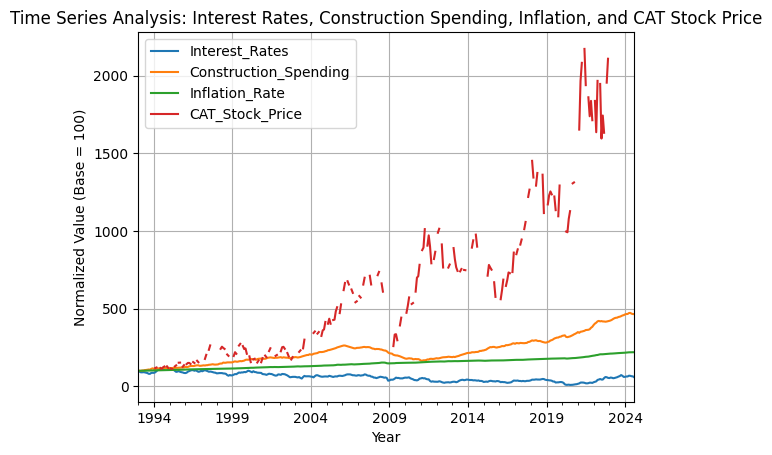

In [ ]:
# Plot the time series for Interest Rates, Construction Spending, Inflation, and Caterpillar Stock Price
plt.figure(figsize=(14, 8))
df_fred_normalized.plot()
plt.title('Time Series Analysis: Interest Rates, Construction Spending, Inflation, and CAT Stock Price')
plt.xlabel('Year')
plt.ylabel('Normalized Value (Base = 100)')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

This visualizes how interest rates, construction spending, inflation, and the stock prices of Caterpillar (as a proxy for construction companies) have evolved over time. Rates has been relatively stable while constrution spending have seen construction stock skyrocket overtime.

b. Distribution Analysis

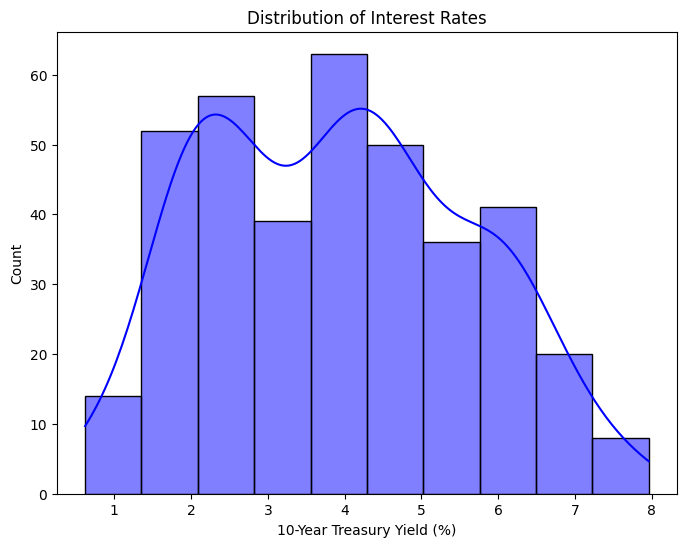

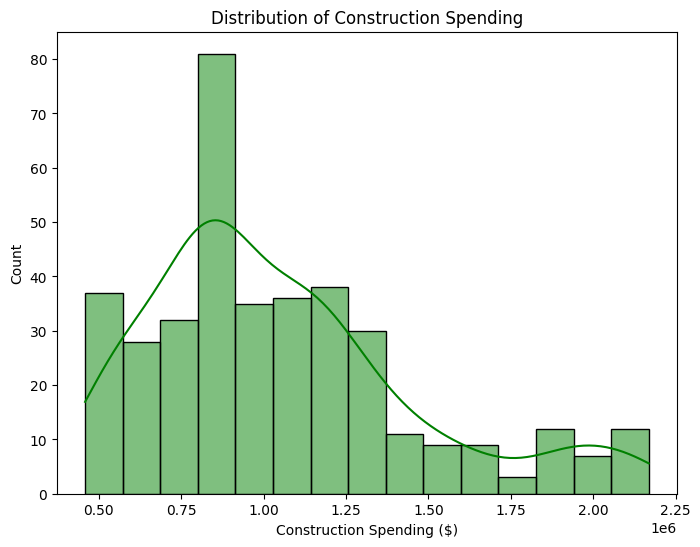

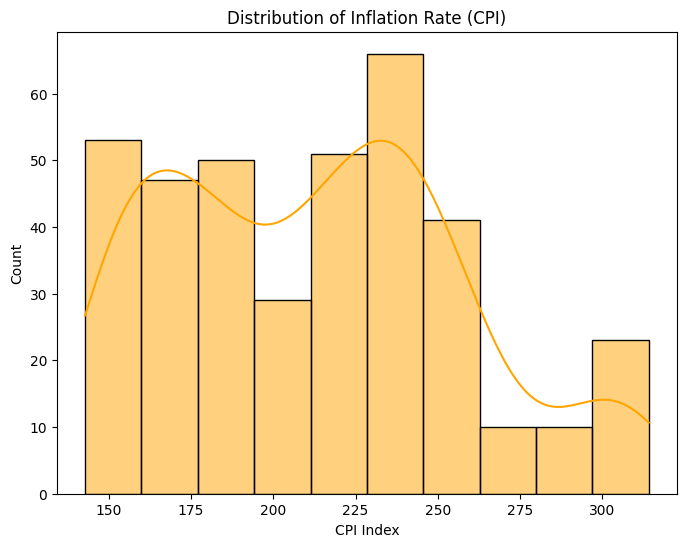

In [ ]:
# Plot the distribution of Interest Rates
plt.figure(figsize=(8, 6))
sns.histplot(df_fred['Interest_Rates'], kde=True, color='blue')
plt.title('Distribution of Interest Rates')
plt.xlabel('10-Year Treasury Yield (%)')
plt.show()

# Plot the distribution of Construction Spending
plt.figure(figsize=(8, 6))
sns.histplot(df_fred['Construction_Spending'], kde=True, color='green')
plt.title('Distribution of Construction Spending')
plt.xlabel('Construction Spending ($)')
plt.show()

# Plot the distribution of Inflation
plt.figure(figsize=(8, 6))
sns.histplot(df_fred['Inflation_Rate'], kde=True, color='orange')
plt.title('Distribution of Inflation Rate (CPI)')
plt.xlabel('CPI Index')
plt.show()

Distribution plots show how interest rates, construction spending, and inflation are spread over time. For example, the distribution of interest rates might reveal periods of higher volatility, which is crucial for understanding risks in fixed-rate lending for construction.

c. 2-Way Relationships

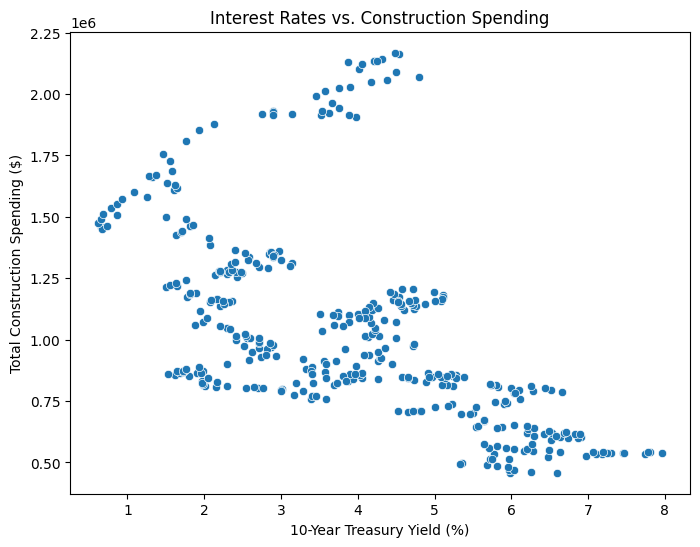

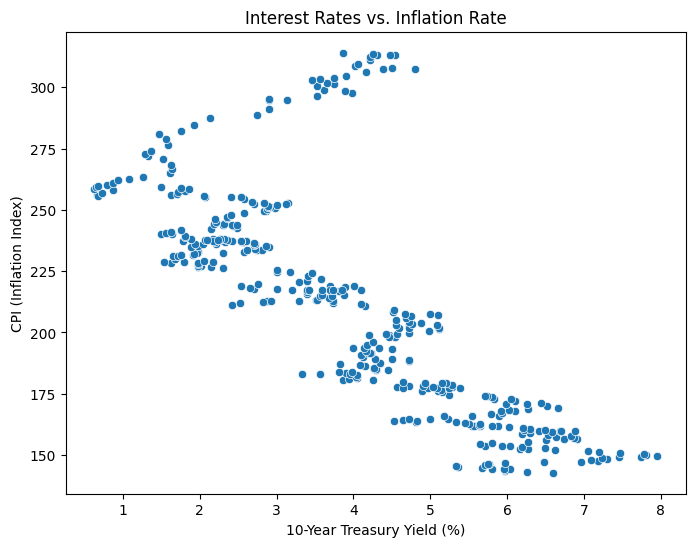

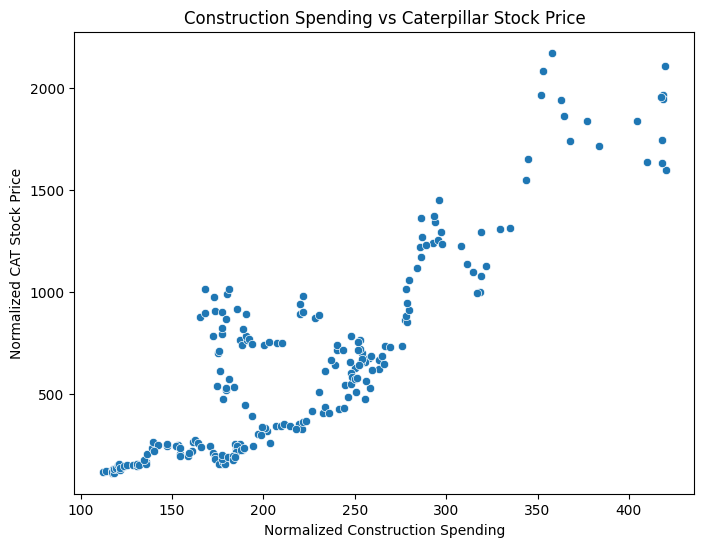

In [ ]:
# Scatter plot: Interest Rates vs Construction Spending
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Interest_Rates', y='Construction_Spending', data=df_fred)
plt.title('Interest Rates vs. Construction Spending')
plt.xlabel('10-Year Treasury Yield (%)')
plt.ylabel('Total Construction Spending ($)')
plt.show()

# Scatter plot: Interest Rates vs Inflation Rate
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Interest_Rates', y='Inflation_Rate', data=df_fred)
plt.title('Interest Rates vs. Inflation Rate')
plt.xlabel('10-Year Treasury Yield (%)')
plt.ylabel('CPI (Inflation Index)')
plt.show()

# Scatter plot: Construction Spending vs Caterpillar Stock Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_fred_normalized['Construction_Spending'], y=df_fred_normalized['CAT_Stock_Price'])
plt.title('Construction Spending vs Caterpillar Stock Price')
plt.xlabel('Normalized Construction Spending')
plt.ylabel('Normalized CAT Stock Price')
plt.show()

Scatter plots shows higher interest rates might suppress construction spending as borrowing becomes more expensive.

d. Correlation Matrix

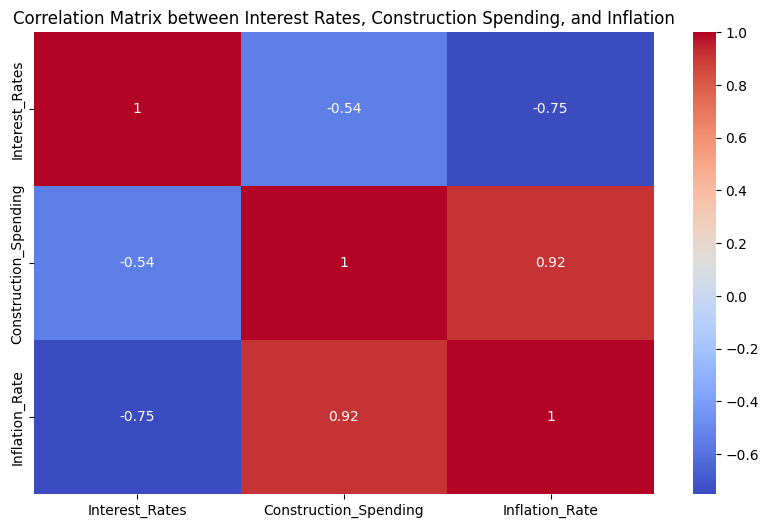

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_fred.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between Interest Rates, Construction Spending, and Inflation')
plt.show()

The correlation matrix shows the degree to which these variables are related. There is a high +ve correlation between inflation and construction spending

## Publicly traded equity

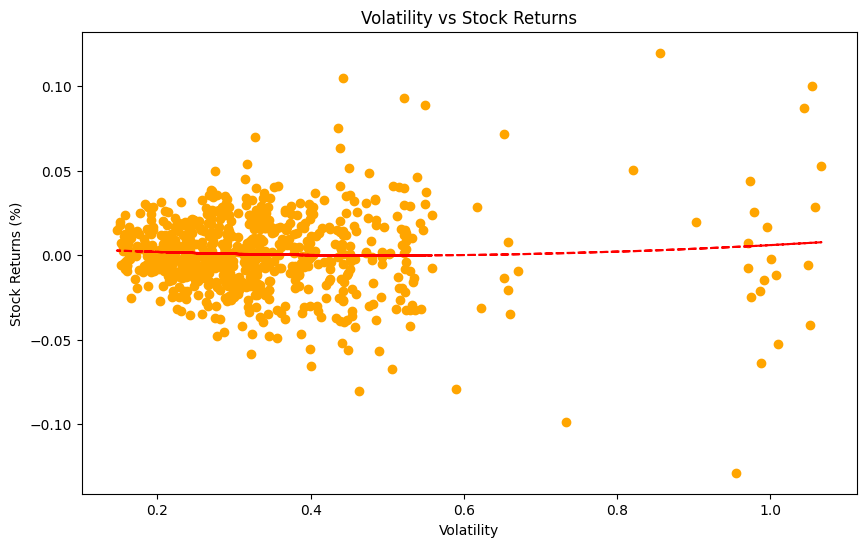

In [ ]:
# Scatter plot for Volatility vs Stock Returns with non-linear trendline
plt.figure(figsize=(10, 6))
plt.scatter(stock_data['Volatility'], stock_data['Daily Returns'], color='orange')
plt.title('Volatility vs Stock Returns')
plt.xlabel('Volatility')
plt.ylabel('Stock Returns (%)')

# Fit a non-linear trend line (polynomial fit)
z = np.polyfit(stock_data['Volatility'], stock_data['Daily Returns'], 2)
p = np.poly1d(z)
plt.plot(stock_data['Volatility'], p(stock_data['Volatility']), "r--")

plt.show()


Insight: Non-linear relationship shows increasing volatility can result in strong swings in both stock returns and declines. Especially compounded in highly leveraged environments.

In [ ]:
# Simulating circuit breaker trigger points (random example dates)
circuit_breaker_trigger = pd.to_datetime(['2020-03-09', '2020-03-12', '2020-03-16'])

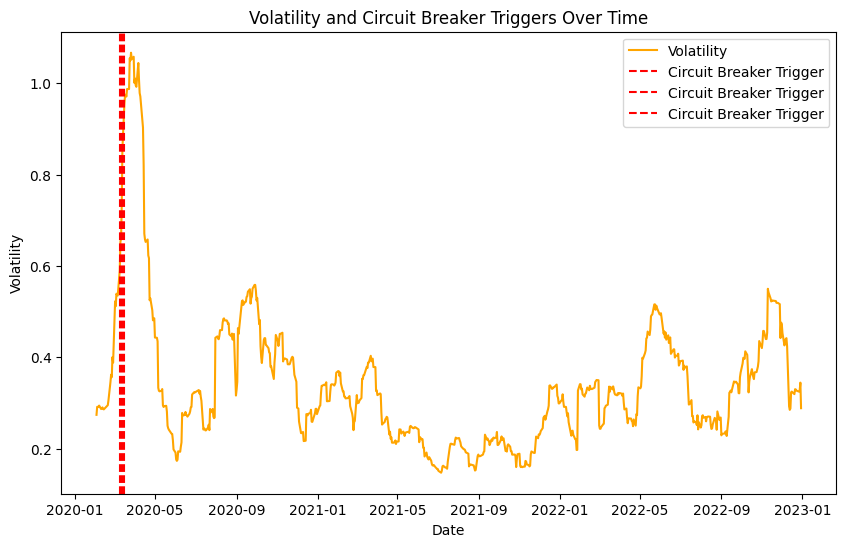

In [ ]:
# Plot stock volatility and mark circuit breaker trigger points
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index, stock_data['Volatility'], label='Volatility', color='orange')

# Assume circuit_breaker_trigger contains dates when circuit breakers were triggered
for trigger_date in circuit_breaker_trigger:
    plt.axvline(x=trigger_date, color='red', linestyle='--', label='Circuit Breaker Trigger')

plt.title('Volatility and Circuit Breaker Triggers Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


Insight: Circuit breakers trigger when trying to calm a chaotic market, signaling extreme market stress where liquidty dries up and volatility spikes.

Volatility was highest during the recent Covid-19 pandemic shown in the graph above.

## Publicly traded bond

In [ ]:
# Setting up FRED API key
fred = Fred(api_key='bdfb2ffb9f9d4b9c8dfda3a5bd6550d0')
start = datetime.date.today() - datetime.timedelta(days=5*365)
end = datetime.date.today()
# Fetching the Treasury Yield and Corporate Bond Yield
treasury_yield = fred.get_series('DGS10', start, end)
corporate_bond_yield = fred.get_series('BAMLCC0A0CMTRIV', start, end)

# Combining the bond_data
bond_data = pd.DataFrame({
    'Treasury_Yield': treasury_yield,
    'Corporate_Bond_Yield': corporate_bond_yield
})
bond_data.dropna(inplace=True)


In [ ]:
#viewing the data
bond_data.head()

,Treasury_Yield,Corporate_Bond_Yield
2014-10-10,2.31,2589.13
2014-10-14,2.21,2602.75
2014-10-15,2.15,2611.50
2014-10-16,2.17,2601.21
2014-10-17,2.22,2597.47


In [ ]:
#getting more information of the data
bond_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2493 entries, 2014-10-10 to 2024-10-03
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Treasury_Yield        2493 non-null   float64
 1   Corporate_Bond_Yield  2493 non-null   float64
dtypes: float64(2)
memory usage: 58.4 KB


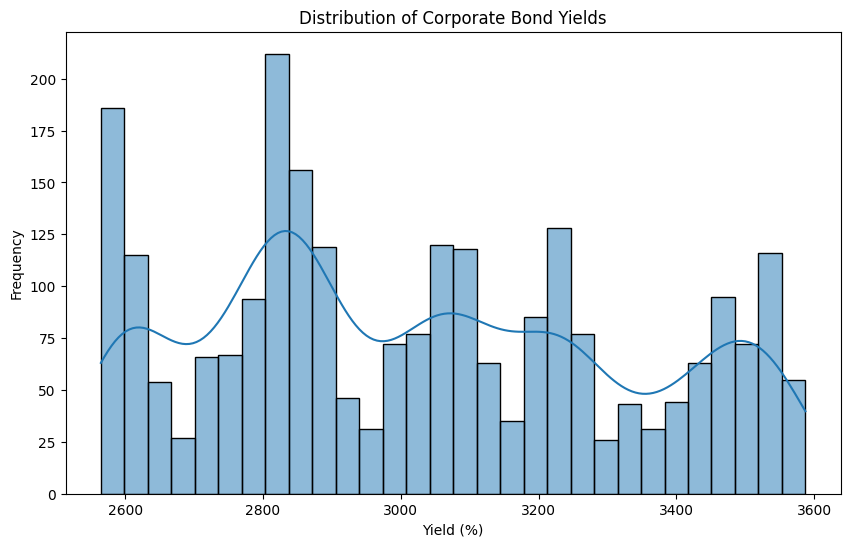

In [ ]:
#corporate bond over time
plt.figure(figsize=(10, 6))
sns.histplot(data=bond_data['Corporate_Bond_Yield'], bins=30, kde=True)
plt.title('Distribution of Corporate Bond Yields')
plt.xlabel('Yield (%)')
plt.ylabel('Frequency')
plt.show()


The Bond price distribution visualizes the price sensitivity to interest rate changes, showing how the long-duration bonds' prices respond to rate changes in a non-linear way.

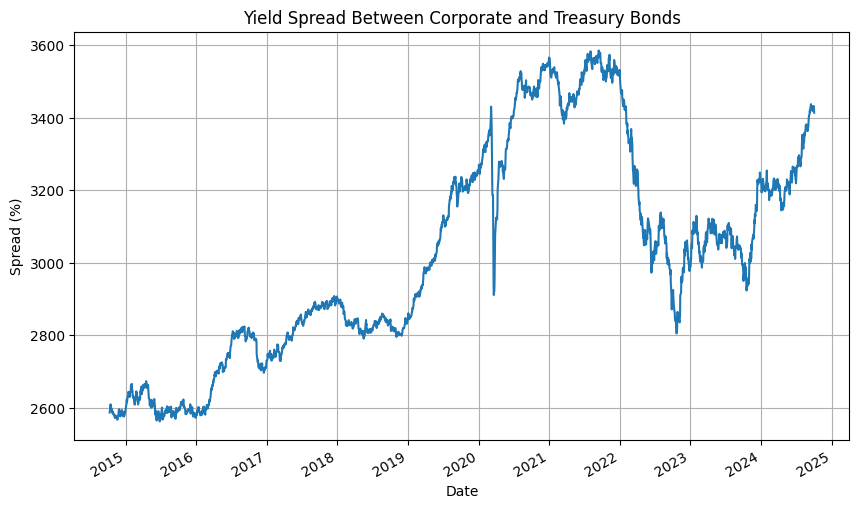

In [ ]:
#Corporate Bond Yield vs. Treasury Yield Spread
bond_data['Yield_Spread'] = bond_data['Corporate_Bond_Yield'] - bond_data['Treasury_Yield']
plt.figure(figsize=(10, 6))
bond_data['Yield_Spread'].plot()
plt.title('Yield Spread Between Corporate and Treasury Bonds')
plt.xlabel('Date')
plt.ylabel('Spread (%)')
plt.grid()
plt.show()


The plot show the spread between corporate bond and treasury yield. A widening spread reveals the rising risk for leveraged corporate bonds, reflecting investor caution and the increasing cost of borrowing for firms.

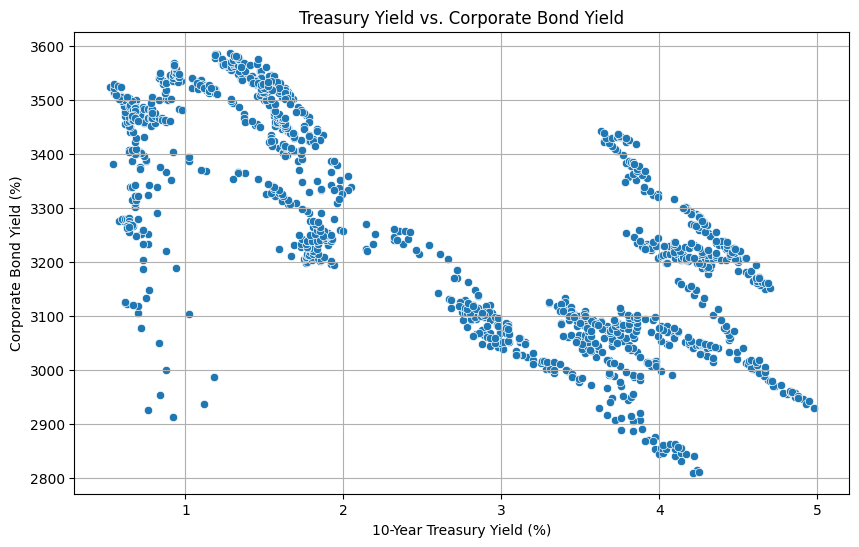

In [ ]:
#Treasury Yield vs. Corporate Bond Yield Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=bond_data['Treasury_Yield'], y=bond_data['Corporate_Bond_Yield'])
plt.title('Treasury Yield vs. Corporate Bond Yield')
plt.xlabel('10-Year Treasury Yield (%)')
plt.ylabel('Corporate Bond Yield (%)')
plt.grid()
plt.show()


The scatter plot compares Treasury and corporate bond yields. The difference between Treasury and corporate yields suggests that regulatory and market-driven liquidity influences corporate yields, where they reflect additional risk and potential regulatory constraints.



## An illiquid security

In [ ]:
# Download bond data for iShares High Yield Corporate Bond ETF (HYG)
bond_data = yf.download('HYG', start='2018-01-01', end='2023-01-01')

# Calculate daily returns to assess volatility
bond_data['Returns'] = bond_data['Close'].pct_change()

# Calculate rolling volatility (using standard deviation of returns)
bond_data['Volatility'] = bond_data['Returns'].rolling(window=21).std() * np.sqrt(252)  # Annualized volatility

# 10-Year Treasury Yield from FRED (Interest Rate Proxy)
interest_rate_data = fred.get_series('GS10')  # 10-Year Treasury Constant Maturity Rate
interest_rate_data = interest_rate_data.loc['2018-01-01':'2023-01-01']  # Aligning dates with bond data

interest_rate_df = pd.DataFrame({'Interest_Rates': interest_rate_data})

# inflation data (Consumer Price Index - CPI)
inflation_data = fred.get_series('CPIAUCSL')
inflation_data = inflation_data.loc['2018-01-01':'2023-01-01']

inflation_df = pd.DataFrame({'Inflation': inflation_data})

# High Yield Spread data from FRED (BAML High Yield Option-Adjusted Spread)
high_yield_spread_data = fred.get_series('BAMLH0A0HYM2')  # High Yield Spread
high_yield_spread_data = high_yield_spread_data.loc['2018-01-01':'2023-01-01']

spread_df = pd.DataFrame({'High_Yield_Spread': high_yield_spread_data})

[*********************100%***********************]  1 of 1 completed


 **Exploratory Data Analysis**


a. Time Series Analysis: Bond Prices, High Yield Spread, Interest Rates, and Inflation

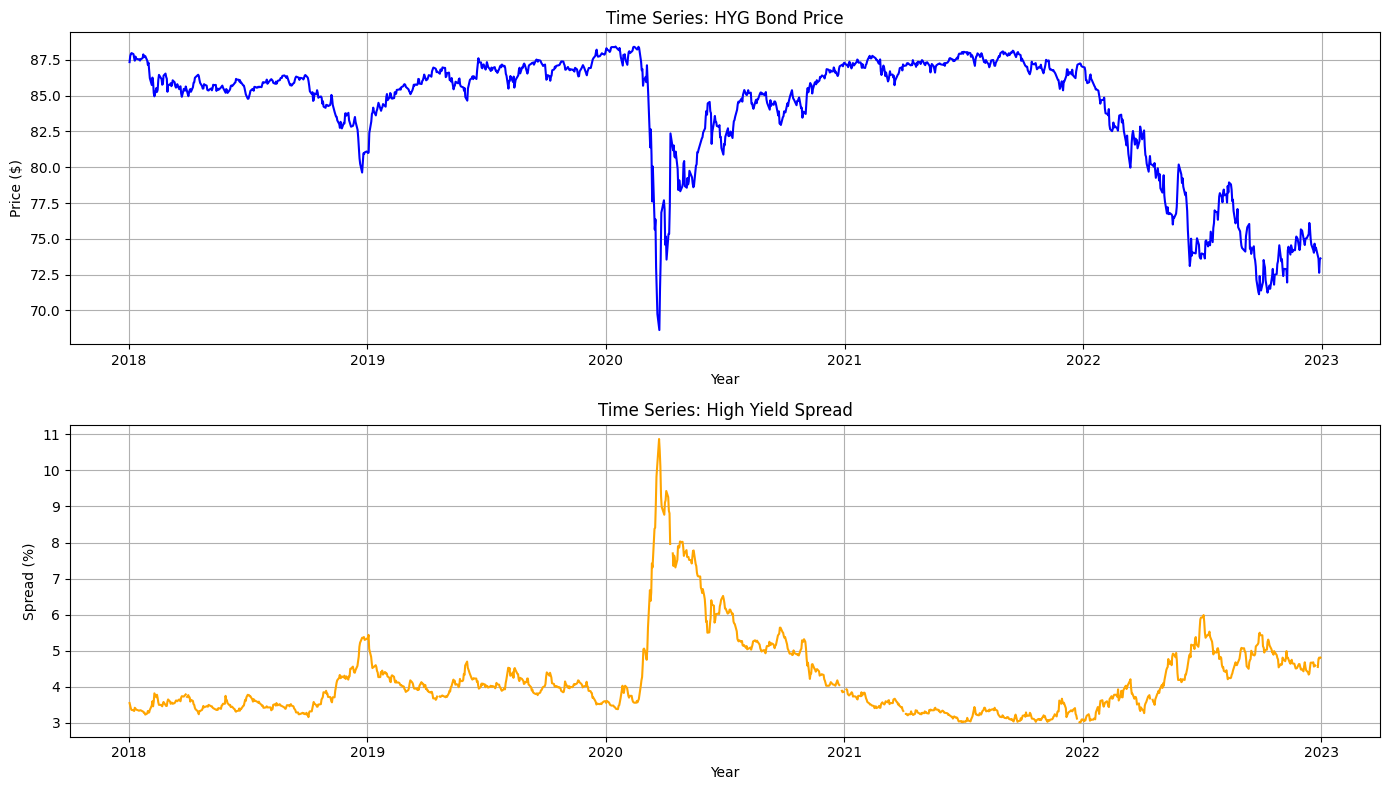

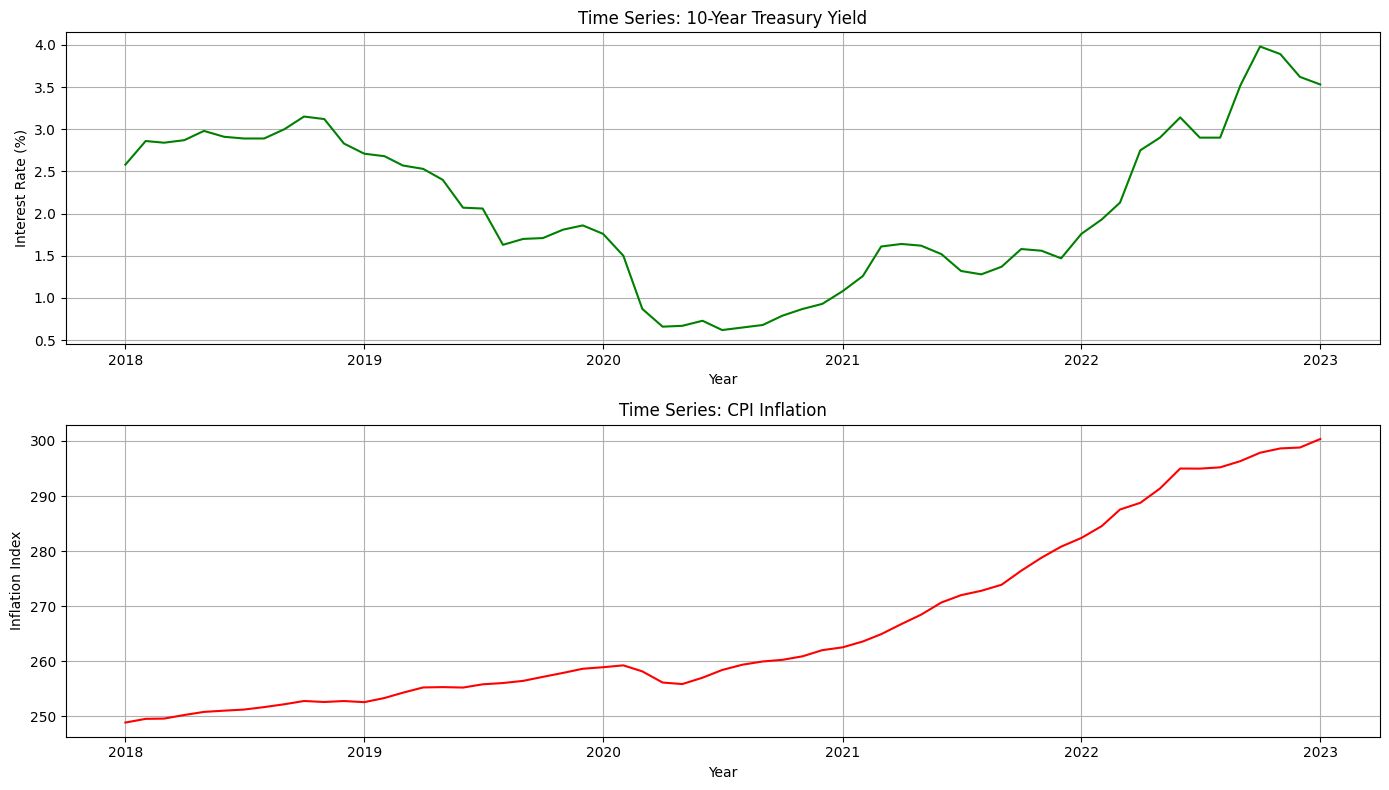

In [ ]:
# Plot the time series for Bond Prices and High Yield Spread
plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)
plt.plot(bond_data.index, bond_data['Close'], label='Bond Price (HYG)', color='blue')
plt.title('Time Series: HYG Bond Price')
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(spread_df.index, spread_df['High_Yield_Spread'], label='High Yield Spread', color='orange')
plt.title('Time Series: High Yield Spread')
plt.xlabel('Year')
plt.ylabel('Spread (%)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot the time series for Interest Rates and Inflation
plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)
plt.plot(interest_rate_df.index, interest_rate_df['Interest_Rates'], label='10-Year Treasury Yield', color='green')
plt.title('Time Series: 10-Year Treasury Yield')
plt.xlabel('Year')
plt.ylabel('Interest Rate (%)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(inflation_df.index, inflation_df['Inflation'], label='CPI Inflation', color='red')
plt.title('Time Series: CPI Inflation')
plt.xlabel('Year')
plt.ylabel('Inflation Index')
plt.grid(True)

plt.tight_layout()
plt.show()

The chart shows a widening Bond Prices and High Yield Spread. A widening high yield spread often indicates higher credit risk or lower liquidity, which can depress bond prices. While higher interest rates or rising inflation erode bond returns, often leading to lower bond prices.

b. Distribution Analysis: Bond Prices, Trading Volume, and Volatility

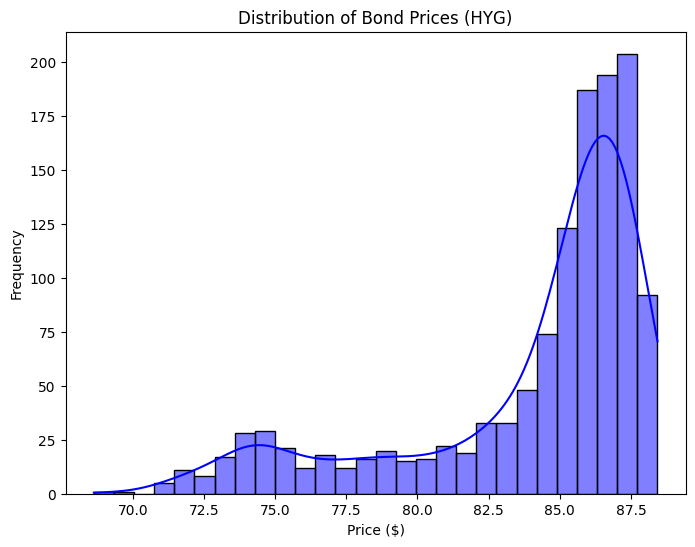

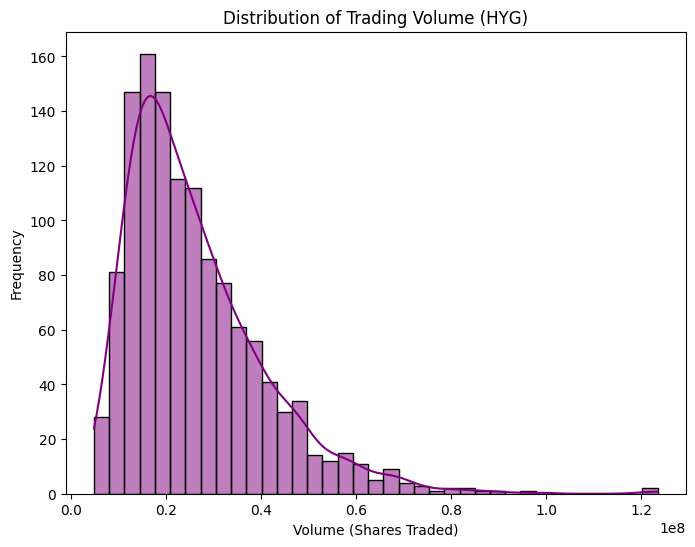

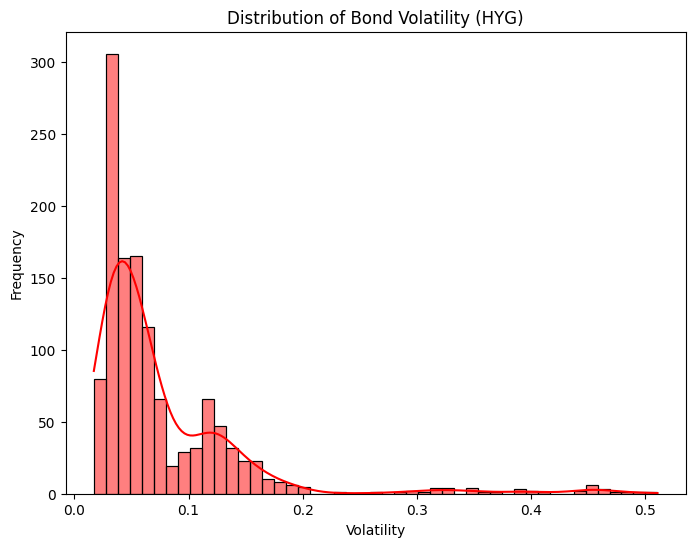

In [ ]:
# Plot the distribution of Bond Prices (HYG)
plt.figure(figsize=(8, 6))
sns.histplot(bond_data['Close'], kde=True, color='blue')
plt.title('Distribution of Bond Prices (HYG)')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of Trading Volume
plt.figure(figsize=(8, 6))
sns.histplot(bond_data['Volume'], kde=True, color='purple')
plt.title('Distribution of Trading Volume (HYG)')
plt.xlabel('Volume (Shares Traded)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of Volatility (Rolling 21-Day Volatility)
plt.figure(figsize=(8, 6))
sns.histplot(bond_data['Volatility'].dropna(), kde=True, color='red')
plt.title('Distribution of Bond Volatility (HYG)')
plt.xlabel('Volatility')
plt.ylabel('Frequency')
plt.show()

The distribution of bond prices reveals periods of volatility or stability, while trading volume distributions help identify liquidity conditions. And the volatility distribution shows periods when the bond exhibited more significant price fluctuations, which is common in illiquid securities.

c. Volatility and Liquidity Analysis

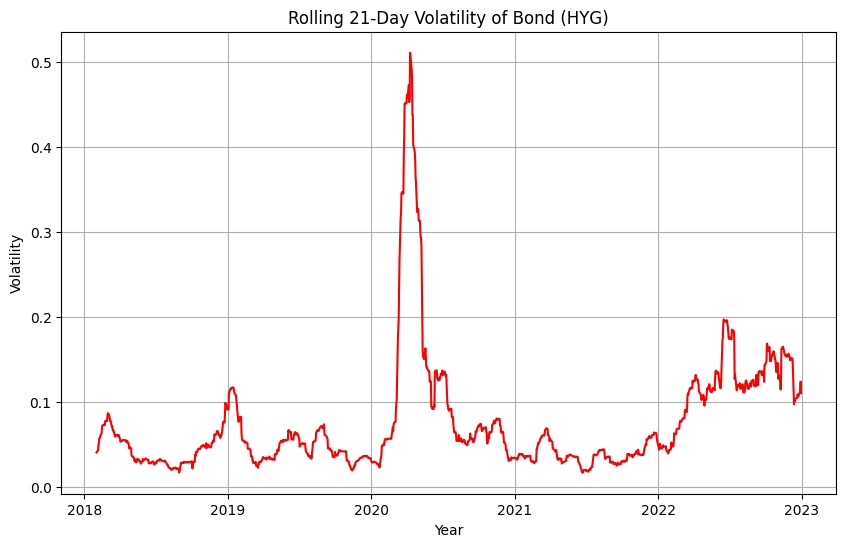

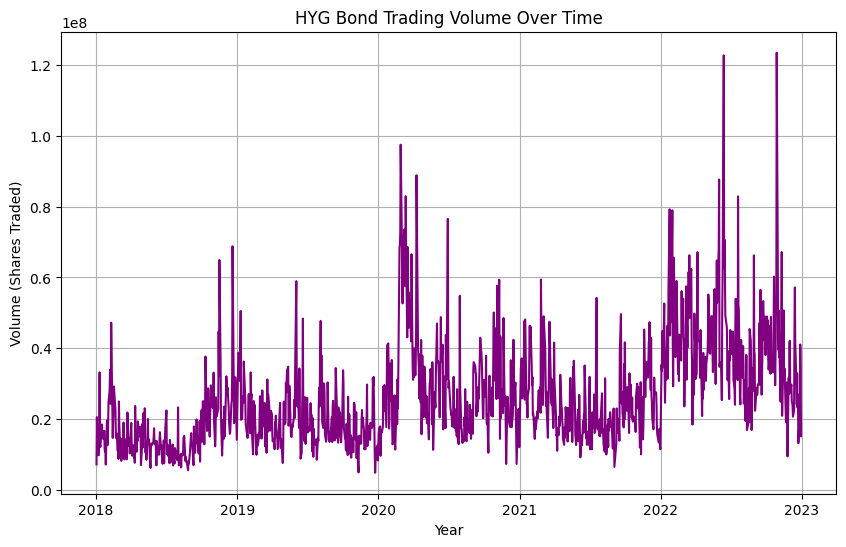

In [ ]:
# Plot Rolling Volatility over time
plt.figure(figsize=(10, 6))
plt.plot(bond_data.index, bond_data['Volatility'], label='Volatility (HYG)', color='red')
plt.title('Rolling 21-Day Volatility of Bond (HYG)')
plt.xlabel('Year')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()

# Plot Volume (Liquidity) over time
plt.figure(figsize=(10, 6))
plt.plot(bond_data.index, bond_data['Volume'], label='Trading Volume (Liquidity Measure)', color='purple')
plt.title('HYG Bond Trading Volume Over Time')
plt.xlabel('Year')
plt.ylabel('Volume (Shares Traded)')
plt.grid(True)
plt.show()

The rolling volatility of the bond shows periods of risk, while trading volume reflects the bond’s liquidity. Lower volumes typically correspond to periods of illiquidity.


d. 2-Way Relationships and Correlation Matrix

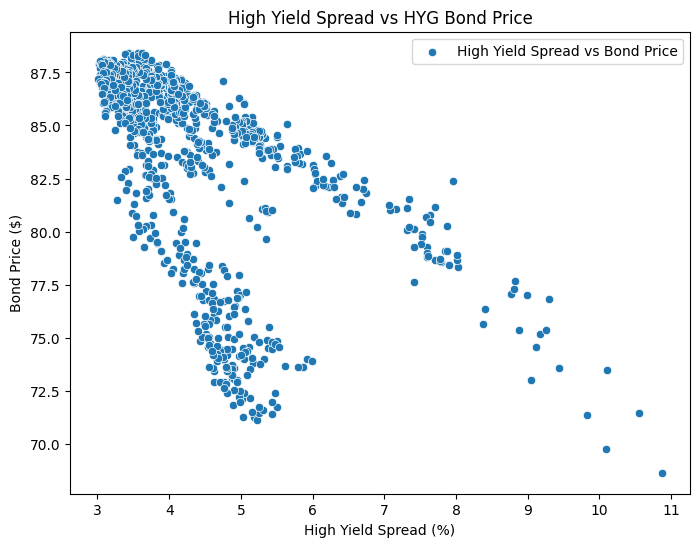

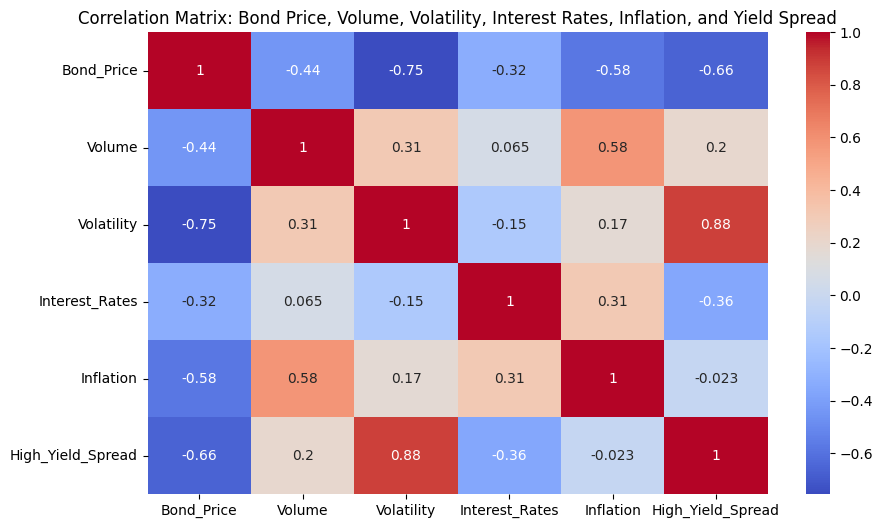

In [ ]:
# Scatter plot: High Yield Spread vs Bond Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x=spread_df['High_Yield_Spread'], y=bond_data['Close'], label='High Yield Spread vs Bond Price')
plt.title('High Yield Spread vs HYG Bond Price')
plt.xlabel('High Yield Spread (%)')
plt.ylabel('Bond Price ($)')
plt.show()

# Correlation Matrix between Bond Price, Volume, Volatility, Interest Rates, Inflation, and High Yield Spread
df_corr = pd.DataFrame({
    'Bond_Price': bond_data['Close'],
    'Volume': bond_data['Volume'],
    'Volatility': bond_data['Volatility'],
    'Interest_Rates': interest_rate_df['Interest_Rates'],
    'Inflation': inflation_df['Inflation'],
    'High_Yield_Spread': spread_df['High_Yield_Spread']
})

# Drop missing data and calculate correlation matrix
df_corr = df_corr.dropna()
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Bond Price, Volume, Volatility, Interest Rates, Inflation, and Yield Spread')
plt.show()

The scatter plot shows the relationship between the high yield spread and bond prices. A higher spread usually indicates lower bond prices, reflecting increased credit risk or illiquidity. While the correlation matrix shows the relationship between bond prices, interest rates, inflation, and high yield spreads, showing how macroeconomic factors influence the illiquid bond market.